In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
ccMax = 96
time = 60
path = "/global/project/projectdirs/m2930/lyl/gf_test/write_test_files/07.12-21.41.58_mpi.txt"
ccList = range(2, ccMax + 2, 2)

In [3]:
tr = []
timeStamps = []
with open(path, 'r') as fp:
        for cc in ccList:
                timestamp = fp.readline().rstrip('\n')
                timeStamps.append(timestamp)
                cc = fp.readline().rstrip('\n')
                sizestr = fp.readline().rstrip('\n')
                #print timestr
                size = sizestr.split("\t")[0]
                #print(size)
                unit = size[-1]
                size = size[:-1]
                
                size = float(size) * (1000 if unit == "T" else 1) 
                speed = size / time
                speed = float("%.2f" % speed)
                tr.append(speed)
                timestamp = fp.readline().rstrip('\n')
                timeStamps.append(timestamp)
                #print("cc=" + str(cc) + ":      " + "write speed=" + str(speed) + "GB/s")

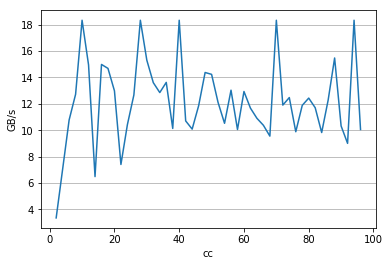

Highest write speed achieved is 18.33GB/s, when cc is 5


In [4]:
plt.plot(ccList, tr)
plt.xlabel("cc")
plt.ylabel("GB/s")
ax = plt.axes()        
ax.yaxis.grid()
plt.show()
trMax = max(tr)
trMaxIdx = tr.index(trMax) + 1
print("Highest write speed achieved is " + str(max(tr)) + "GB/s, when cc is " + str(trMaxIdx))